<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/29324_cat_dr_normal_glaucoma_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split')

['train', 'val', 'test']

In [3]:
os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/train')


['cataract', 'diabetic_retinopathy', 'normal', 'glaucoma']

In [5]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1/255,
                           rotation_range = 20,
                           width_shift_range = 0.2,
                           height_shift_range = 0.2,
                           shear_range = 0.2,
                           zoom_range = 0.2,
                           horizontal_flip = 0.2,
                           vertical_flip = 0.2)

trainimages=datagen.flow_from_directory('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/train',
                                        target_size=(64,64),
                                        class_mode='categorical')

valimages=datagen.flow_from_directory('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/val',
                                        target_size=(64,64),
                                        class_mode='categorical')

testimages=datagen.flow_from_directory('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/test',
                                        target_size=(64,64),
                                        class_mode='categorical')


Found 2945 images belonging to 4 classes.
Found 841 images belonging to 4 classes.
Found 426 images belonging to 4 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model=Sequential([Conv2D(32,(3,3), activation='relu', input_shape = (64,64,3)),
                  MaxPooling2D(2,2),

                  Conv2D(64,(3,3), activation='relu'),
                  MaxPooling2D(2,2),

                  Flatten(),
                  Dense(32, activation='relu'),
                  Dense(4, activation='softmax')])

model.compile(optimizer = "rmsprop",
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 32)                4

In [32]:
model.fit(trainimages,
          batch_size=32,
          epochs=10,
          validation_data=valimages)
model.save('cnn_model.keras')

Epoch 1/10
93/93 [==============================] - 63s 678ms/step - loss: 1.0461 - accuracy: 0.5447 - val_loss: 0.9683 - val_accuracy: 0.5779
Epoch 2/10
93/93 [==============================] - 73s 785ms/step - loss: 1.0201 - accuracy: 0.5579 - val_loss: 0.9883 - val_accuracy: 0.5577
Epoch 3/10
93/93 [==============================] - 71s 769ms/step - loss: 0.9916 - accuracy: 0.5647 - val_loss: 0.9346 - val_accuracy: 0.5933
Epoch 4/10
93/93 [==============================] - 72s 779ms/step - loss: 0.9516 - accuracy: 0.5874 - val_loss: 0.9419 - val_accuracy: 0.5993
Epoch 5/10
93/93 [==============================] - 72s 774ms/step - loss: 0.9499 - accuracy: 0.5935 - val_loss: 0.9192 - val_accuracy: 0.6017
Epoch 6/10
93/93 [==============================] - 73s 784ms/step - loss: 0.9342 - accuracy: 0.5973 - val_loss: 0.8937 - val_accuracy: 0.6040
Epoch 7/10
93/93 [==============================] - 63s 678ms/step - loss: 0.9143 - accuracy: 0.6122 - val_loss: 0.9291 - val_accuracy: 0.6195

In [37]:
predictions = model.predict(testimages)

14/14 [==============================] - 6s 430ms/step


In [38]:
y_pred = np.argmax(predictions, axis=1)

In [39]:
y_true = testimages.classes

In [40]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred)

array([[16, 33, 20, 36],
       [17, 34, 30, 30],
       [ 7, 22, 31, 42],
       [ 9, 39, 21, 39]])

In [41]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.15      0.21       105
           1       0.27      0.31      0.28       111
           2       0.30      0.30      0.30       102
           3       0.27      0.36      0.31       108

    accuracy                           0.28       426
   macro avg       0.29      0.28      0.28       426
weighted avg       0.29      0.28      0.28       426



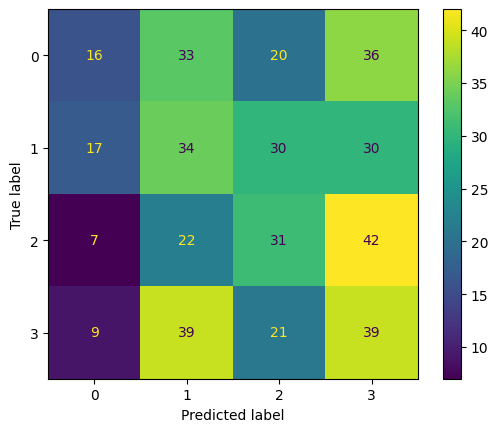

In [42]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('multiclass_classification_cnn_model.h5')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["Class A", "Class B", "Class C"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "unknown_image.jpg"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)
